In [105]:
# Approximating functions
from sympy import *
from random import Random
from math import copysign


In [215]:
r = Random(1)
ri = lambda: r.randint(-10, 10)

I_0, I_1, I_2, w_g0, w_g1, w_g2, w_h0, w_h1, w_h2, w_f0, w_f1, E = \
    symbols('I_0 I_1 I_2 w_g0 w_g1 w_g2 w_h0 w_h1 w_h2 w_f0 w_f1, E')

G = 1/(1 + exp(-1 * (I_0*w_g0 + I_1*w_g1 + I_2*w_g2)))
H = 1/(1 + exp(-1 * (I_0*w_h0 + I_1*w_h1 + I_2*w_h2)))
F = 1/(1 + exp(-1* (G*w_f0 + H*w_f1)))
F

1/(exp(-w_f0/(exp(-I_0*w_g0 - I_1*w_g1 - I_2*w_g2) + 1) - w_f1/(exp(-I_0*w_h0 - I_1*w_h1 - I_2*w_h2) + 1)) + 1)

In [216]:
V = I_0 + 3*I_1 + 7*I_2
V

I_0 + 3*I_1 + 7*I_2

In [217]:
Inputs = dict([
    (I_0, ri()),(I_1, ri()),(I_2, ri())
])
weights = dict([ # Inputs
    [w_g0, ri()],[w_g1, ri()],[w_g2, ri()], # g weights
    [w_h0, ri()],[w_h1, ri()],[w_h2, ri()], # h weights
    [w_f0, ri()],[w_f1, ri()], # f weights
])
F.subs(Inputs).subs(weights)

1/(1 + exp(-2/(1 + exp(84)) + 4/(1 + exp(64))))

In [218]:
V.subs(Inputs)

-38

In [222]:
E = F - V
E

-I_0 - 3*I_1 - 7*I_2 + 1/(exp(-w_f0/(exp(-I_0*w_g0 - I_1*w_g1 - I_2*w_g2) + 1) - w_f1/(exp(-I_0*w_h0 - I_1*w_h1 - I_2*w_h2) + 1)) + 1)

In [223]:
E.subs(Inputs).subs(weights)

1/(1 + exp(-2/(1 + exp(84)) + 4/(1 + exp(64)))) + 38

In [224]:
float(E.diff(w_g0).subs(Inputs).subs(weights))

-9.917101880282202e-37

In [225]:
weights

{w_g0: -2, w_g1: -7, w_g2: 5, w_h0: 4, w_h1: 5, w_h2: 10, w_f0: 2, w_f1: -4}

In [231]:
weights_ = weights.copy()
calc_E = lambda: float(F.subs(weights_).subs(Inputs) - E.subs(weights_).subs(Inputs))
print(f"Start error {float(calc_E())}")
info = True
for i in range(2):
    adjusted_weights = []
    alpha = 10**10
    error = calc_E()
    info and print(f"Step error {float(calc_E())}")
    for i, w in enumerate(map(list, weights_.items())):
        adjust = alpha * E.diff(w[0]).subs(weights_).subs(Inputs)
        info and print(f"adjust: {float(adjust)}")
        w_ = w[1] - float(adjust)
        info and print(f"{w[0]}: {w[1]} -> {w_}")
        w[1] = w_
        adjusted_weights.append(w)
    weights_ = dict(adjusted_weights)
print(f"Final error {calc_E()}")

Start error -38.0
Step error -38.0
adjust: -9.917101880282202e-27
w_g0: -2 -> -2.0
adjust: 1.3222802507042936e-26
w_g1: -7 -> -7.0
adjust: -1.3222802507042936e-26
w_g2: 5 -> 5.0
adjust: 9.622865343291826e-18
w_h0: 4 -> 4.0
adjust: -1.2830487124389103e-17
w_h1: 5 -> 5.0
adjust: 1.2830487124389103e-17
w_h2: 10 -> 10.0
adjust: 8.264251566901835e-28
w_f0: 2 -> 2.0
adjust: 4.009527226371595e-19
w_f1: -4 -> -4.0
Step error -38.0
adjust: -9.917101880282202e-27
w_g0: -2.0 -> -2.0
adjust: 1.322280250704294e-26
w_g1: -7.0 -> -7.0
adjust: -1.322280250704294e-26
w_g2: 5.0 -> 5.0
adjust: 9.622865343291823e-18
w_h0: 4.0 -> 4.0
adjust: -1.28304871243891e-17
w_h1: 5.0 -> 5.0
adjust: 1.28304871243891e-17
w_h2: 10.0 -> 10.0
adjust: 8.264251566901837e-28
w_f0: 2.0 -> 2.0
adjust: 4.0095272263715953e-19
w_f1: -4.0 -> -4.0
Final error -38.0


In [150]:

m = 1/2
b = 1
a = (10, 800)
e = (m*a[0] + b) - a[1]
alpha = 0.01
print(f"initial error is {e}")
info = False
for i in range(100000):
    info and print(f"--------------- {i}")
    e = (m*a[0] + b) - a[1]
    #print(f"Error is {e}")
    m_ = m - copysign(alpha * a[0], e)
    b_ = b - copysign(alpha * 1, e)
    info and print(f"updating m ({m}) -> ({m_})")
    info and print(f"updating b ({b}) -> ({b_})")
    m = m_
    b = b_
print(f"final error is {(m*a[0] + b) - a[1]}")


initial error is -794.0
final error is -0.1400000000022601


In [2]:
import sympy as sym
# Use sympy package to display the equation
sym.init_printing()
#sym.solve()
a,b,c,d = sym.symbols('a,b,c,d')

solns = sym.solve([
    b*d + a*c - 1, 
    b*c + a*d ],
    [c, d])
print(f"Intersectiion is ({solns[c]}, {solns[d]}) ")

Intersectiion is (a/(a**2 - b**2), -b/(a**2 - b**2)) 


In [29]:
import sympy as sym
# Use sympy package to display the equation
sym.init_printing()
#sym.solve()
a,b,c,d,e,x = sym.symbols('a,b,c,d,e,x')

solns = sym.solve([
    b*(6-x) + c*(6-x)**2 + d*(6-x)**3 + e*(6-x)**4,
],
    [b,c,d,e,x])
solns

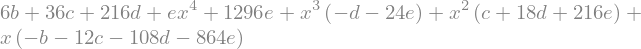

In [28]:
from sympy import *
collect(expand(b*(6-x) + c*(6-x)**2 + d*(6-x)**3 + e*(6-x)**4), x)
0=𝑒+𝑑61+𝑐62+𝑏63+𝑎64
𝑒=−𝑑61−𝑐62−𝑏63−𝑎64

In [50]:
e = -b * 6 - c * pow(6, 2) - d * pow(6, 3)
p = e + b*x + c*x**2 + d*x**3 + e*x**4
factor(p, x)